In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('NBASalaryData03-17.csv')
df.head()

,team,salary,player,position,season
0,Minnesota Timberwolves,25200000.0,Kevin Garnett,PF,2002-2003
1,Portland Trail Blazers,13500000.0,Damon Stoudamire,PG,2002-2003
2,Seattle SuperSonics,13080000.0,Gary Payton,PG,2002-2003
3,Seattle SuperSonics,12375000.0,Ray Allen,SG,2002-2003
4,New York Knicks,12375000.0,Latrell Sprewell,SG,2002-2003


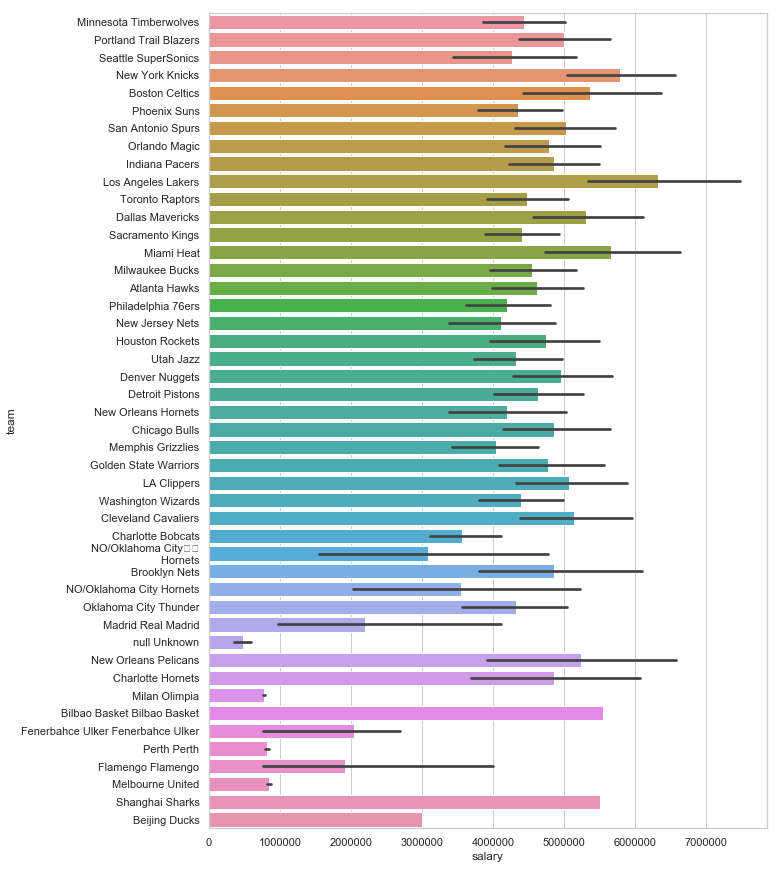

In [13]:
sns.set(style='whitegrid')
f, ax = plt.subplots(figsize=(10, 15))

sns.barplot(x='salary', y='team', data=df)

In [20]:
X = df.drop(['salary'], axis=1)
X = pd.get_dummies(X)
y = df['salary']

regr = linear_model.LinearRegression()
regr.fit(X,y)
print(X.head())
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, y))

   team_Atlanta Hawks  team_Beijing Ducks  team_Bilbao Basket Bilbao Basket  \
0                   0                   0                                 0   
1                   0                   0                                 0   
2                   0                   0                                 0   
3                   0                   0                                 0   
4                   0                   0                                 0   

   team_Boston Celtics  team_Brooklyn Nets  team_Charlotte Bobcats  \
0                    0                   0                       0   
1                    0                   0                       0   
2                    0                   0                       0   
3                    0                   0                       0   
4                    0                   0                       0   

   team_Charlotte Hornets  team_Chicago Bulls  team_Cleveland Cavaliers  \
0                       0    

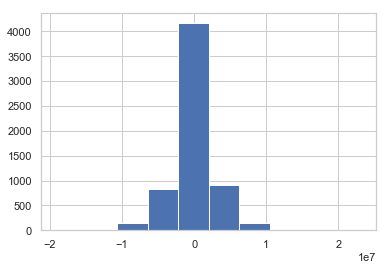

In [21]:
# Multicolinearity
predicted = regr.predict(X).ravel()
actual = df['salary']

residual = actual - predicted

plt.hist(residual)
plt.show()

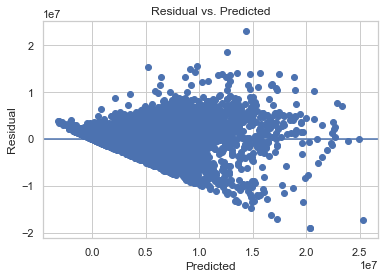

In [22]:
# Homoskedasticity
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

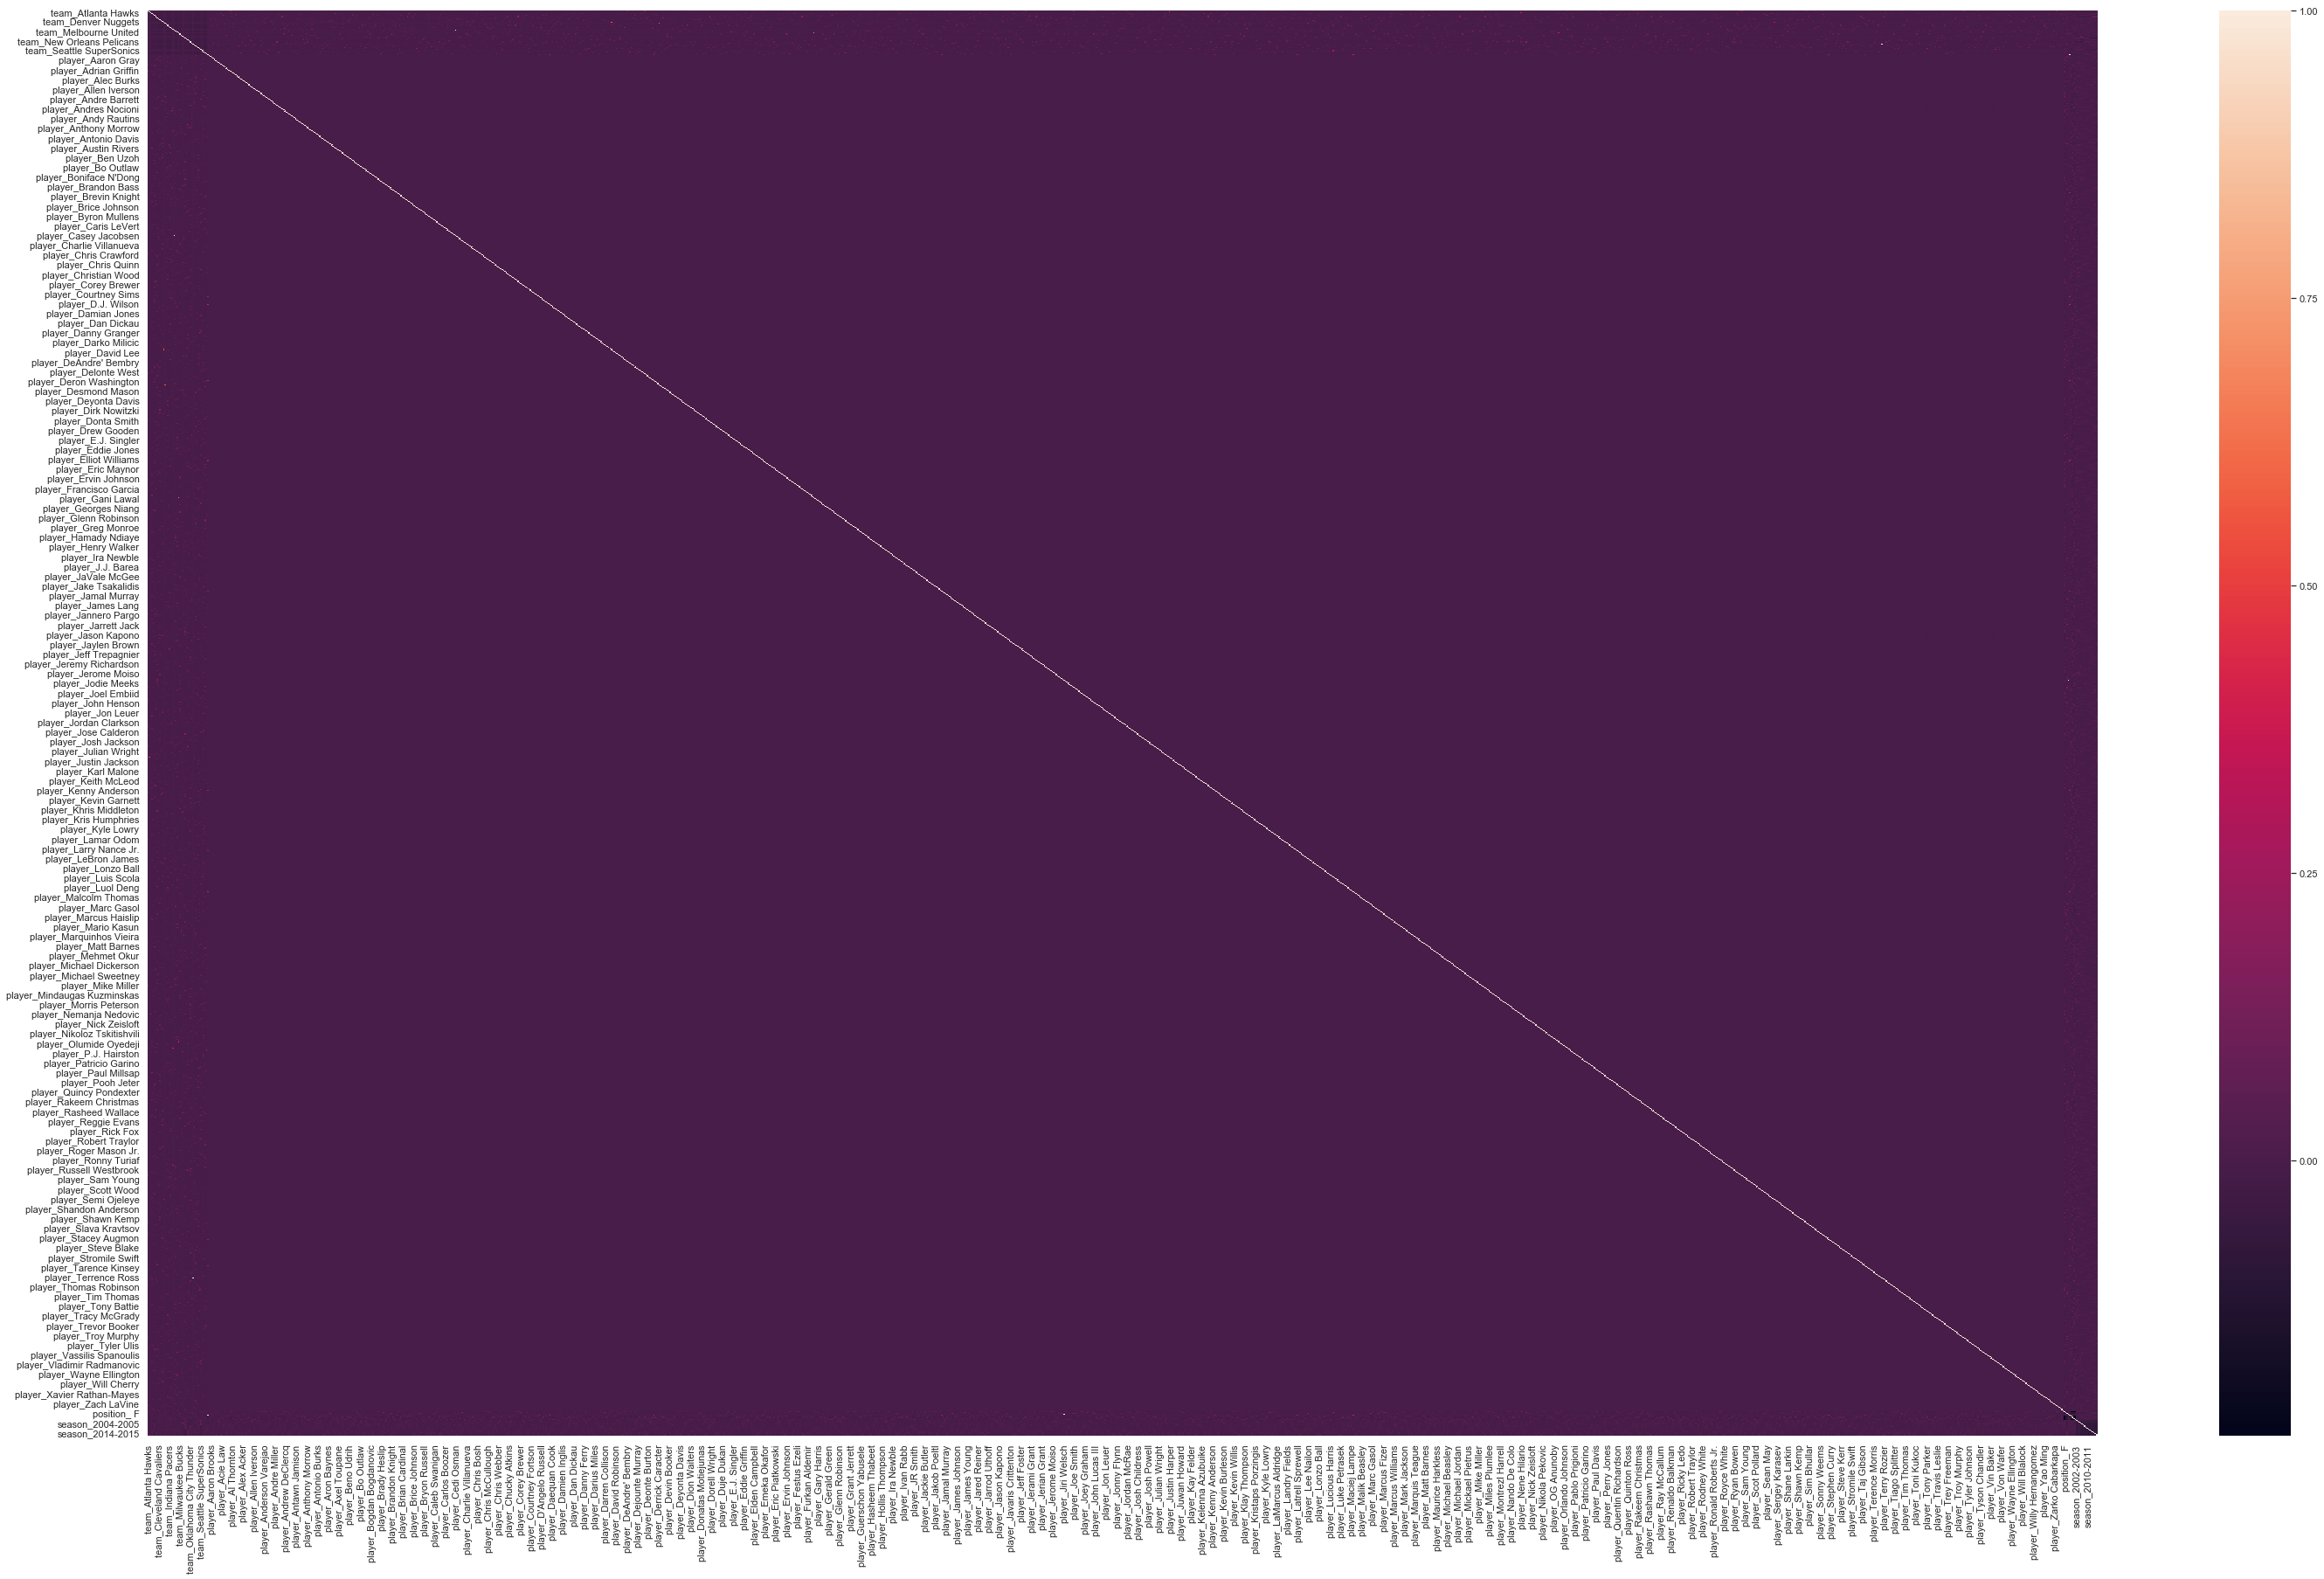

In [26]:
correlation_matrix = X.corr()
fig, ax = plt.subplots(figsize=(50, 30))
ax = sns.heatmap(correlation_matrix)

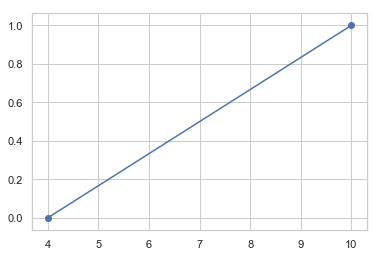

In [29]:
y = [0,1]
x = [4,10]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

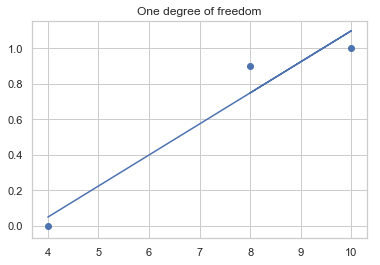

In [30]:
y=[0, 1, .9]
x=[4, 10, 8]
plt.scatter(x, y)
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x))
plt.title("One degree of freedom")
plt.show()

In [31]:
data_url = 'https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv'
data = pd.read_csv(data_url, index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [34]:
linear_formula = 'Sales ~ TV+Radio+Newspaper'
lm = smf.ols(formula=linear_formula, data=data).fit()

In [35]:
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [36]:
lm.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64

In [37]:
lm.rsquared

0.89721063817895219